In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = 'names'

## Task 1

In [51]:
df = pd.read_csv(f'{path}/yob2000.txt', names=['name', 'gender', 'count'], header=None)

total = df['count'].sum()

df['percent'] = df['count'] * 100 / total

df

,name,gender,count,percent
0,Emily,F,25957,0.686806
1,Hannah,F,23085,0.610814
2,Madison,F,19968,0.528341
3,Ashley,F,17997,0.476189
4,Sarah,F,17708,0.468542
...,...,...,...,...
29771,Zeph,M,5,0.000132
29772,Zeven,M,5,0.000132
29773,Ziggy,M,5,0.000132
29774,Zo,M,5,0.000132


## Task 2 - my soltion but not working

In [52]:
import os
import re

namesDirectory = os.fsencode('names')
    
for file in os.listdir(namesDirectory):
     filename = os.fsdecode(file)
     if filename.endswith(".txt"):
        df = pd.read_csv(f'{path}/{filename}', names=['name', 'gender', 'count'])
        year = re.findall(r'\d+', filename)
        # df['year'] = year # why is this not working?
     else:
         continue

## Task 2 - sample solution

In [53]:
data = []
for year in range(1880, 2022):
    df = pd.read_csv(os.path.join(path, f'yob{year}.txt'), names=['name', 'gender', 'count'])
    df['year'] = year
    data.append(df)
    
df = pd.concat(data, axis=0, ignore_index=True)
df

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


## Task 3

<AxesSubplot: xlabel='year'>

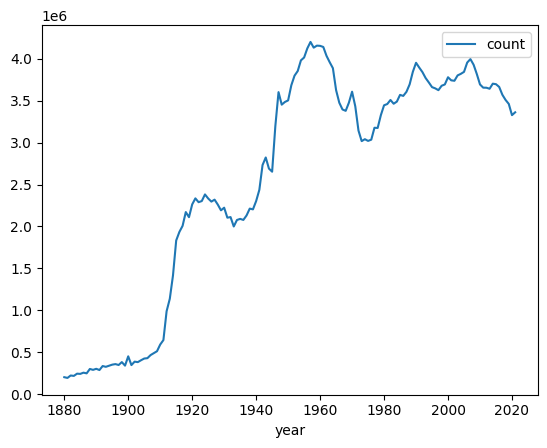

In [54]:
data = []

for year in range(1880, 2022):
    yearlyData = [year, df.groupby('year')['count'].sum()[year]]
    data.append(yearlyData)

birthPerYearDf = pd.DataFrame(data, columns=['year', 'count'])

birthPerYearDf = birthPerYearDf.set_index('year')

birthPerYearDf.plot()

## Task 4

In [55]:
df.loc[df['name'] == 'Zino']


,name,gender,count,year
2049514,Zino,M,7,2021


<AxesSubplot: xlabel='year'>

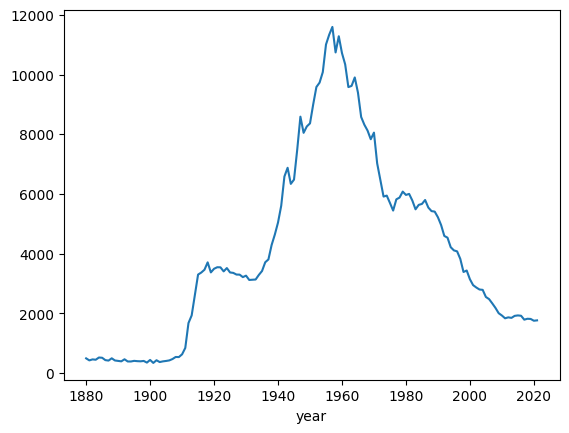

In [114]:
# I copied your solution.... couldn't make it after half an hour

all_years = list(range(1880, 2022))
zeros = [0 for _ in all_years]
empty = pd.Series(zeros, index=all_years, name='count')

peter = df[(df['name'] == 'Peter') & (df['gender']=='M')]
peter.set_index('year', inplace=True)
peter = peter['count'] + empty # necessary if you want to extend to the beginning
peter.fillna(0.0, inplace=True)
peter.plot()


## Task 5

<AxesSubplot: xlabel='year', ylabel='count'>

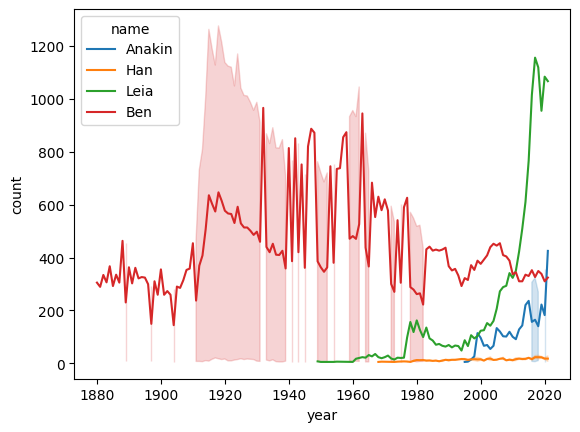

In [101]:
celebrities = df.set_index('name').loc[['Anakin', 'Han', 'Leia', 'Ben']]

sns.lineplot(data=celebrities, x='year', y='count', hue='name')

## Task 6

<AxesSubplot: xlabel='year'>

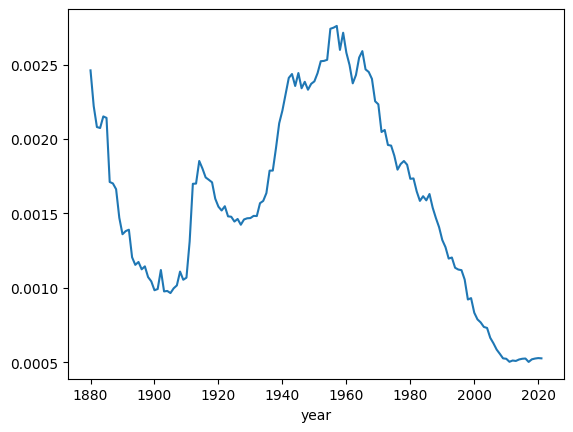

In [115]:
year_total = df.groupby('year')['count'].sum()

normalizedName = normalized = peter / year_total

normalizedName.plot()

It is important to see the overall share of the population in the US of that name. Because the population grew over the last 250 years, every name is probably more frequent in today's data then in the data from 1880. But as you see above, 'Peter' was a much more widespread name in 1880 (0.25% of all names) then in 2020 (0.05% of all names)